<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

**Potential Questions
List the given or obvious questions.**

**1)Are there any categorical variables in the dataset? How should they be encoded for modeling?**

**2)Which machine learning algorithms are commonly used for blood donation prediction?**

**3)What techniques can be used for hyperparameter tuning and model selection?**

**4)How can model interpretability be achieved to understand the factors influencing blood donation?**

**Actual Question**

Can we build a predictive model to classify whether a blood donor will donate blood in the future based on the given features in the blood donation dataset?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# datasets and model prep
from sklearn import datasets # to import sklearn datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest # use a simple option for now
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV

# models
from sklearn.linear_model import LinearRegression, LogisticRegression # model
from sklearn.svm import SVC

# model evaluation
from sklearn.inspection import DecisionBoundaryDisplay # to plot the decision boundary
from sklearn.metrics import accuracy_score, roc_curve, RocCurveDisplay, roc_curve, get_scorer_names,\
                            classification_report, confusion_matrix ,ConfusionMatrixDisplay # review model metrics

seed = 1234

In [4]:

blood= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data")
blood=pd.DataFrame(blood)
blood.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [5]:
blood.shape

(748, 5)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [6]:
#Number of features
num_features= blood.shape[1]
print("Number of features",num_features)

Number of features 5


In [7]:
#Data types
blood.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [8]:
blood.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [9]:
#Domains, Intervals
for column in blood.columns:
    unique_values = blood[column].unique()
    num_unique_values = len(unique_values)
    if num_unique_values <= 10:  # For columns with 10 or fewer unique values, treat them as categorical
            print(f"{column}: Categorical")
            print("Unique Values:", unique_values)
    else:
            print(f"{column}: Numerical")
            min_value = blood[column].min()
            max_value = blood[column].max()
            interval = max_value - min_value
            print("Minimum Value:", min_value)
            print("Maximum Value:", max_value)
            print("Interval:", interval)

Recency (months): Numerical
Minimum Value: 0
Maximum Value: 74
Interval: 74
Frequency (times): Numerical
Minimum Value: 1
Maximum Value: 50
Interval: 49
Monetary (c.c. blood): Numerical
Minimum Value: 250
Maximum Value: 12500
Interval: 12250
Time (months): Numerical
Minimum Value: 2
Maximum Value: 98
Interval: 96
whether he/she donated blood in March 2007: Categorical
Unique Values: [1 0]


[]

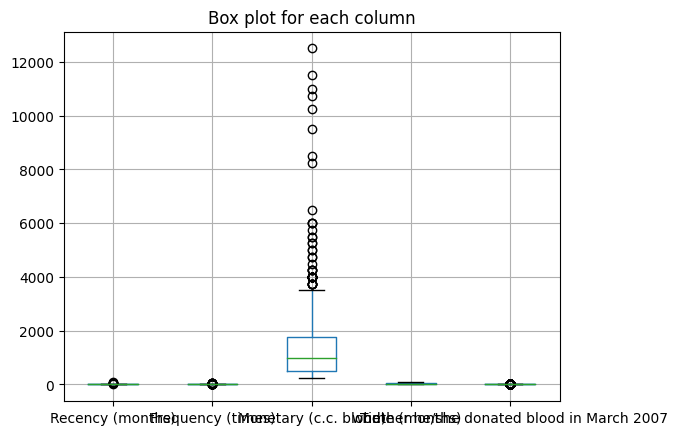

In [10]:
#check for outliers 
#plot Box plot for each column
blood.boxplot()
#set title for each plot
plt.title('Box plot for each column')
plt.plot()

In [11]:
# Check for outliers in numerical features
outliers = []
for feature in blood.columns:
    q1 = blood[feature].quantile(0.25)
    q3 = blood[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_count = blood[(blood[feature] < lower_bound) | (blood[feature] > upper_bound)].shape[0]
    outliers.append(outlier_count)
outliers_df = pd.DataFrame({'Feature': blood.columns, 'Outliers': outliers})
print("Outliers:")
print(outliers_df)

Outliers:
                                      Feature  Outliers
0                            Recency (months)         7
1                           Frequency (times)        45
2                       Monetary (c.c. blood)        45
3                               Time (months)         0
4  whether he/she donated blood in March 2007       178


In [9]:
#check for Null values
blood.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [10]:
#check for missing values
blood.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [11]:
# Check for coded content
for column in blood.columns:
    unique_values = blood[column].unique()
    
    # Identify coded values representing absence of data
    coded_values = [value for value in unique_values if pd.isnull(value) or value == 0 or value == '']
    
    if len(coded_values) > 0:
        print(f"{column}: Coded content")
        print("Coded Values:", coded_values)

Recency (months): Coded content
Coded Values: [0]
whether he/she donated blood in March 2007: Coded content
Coded Values: [0]


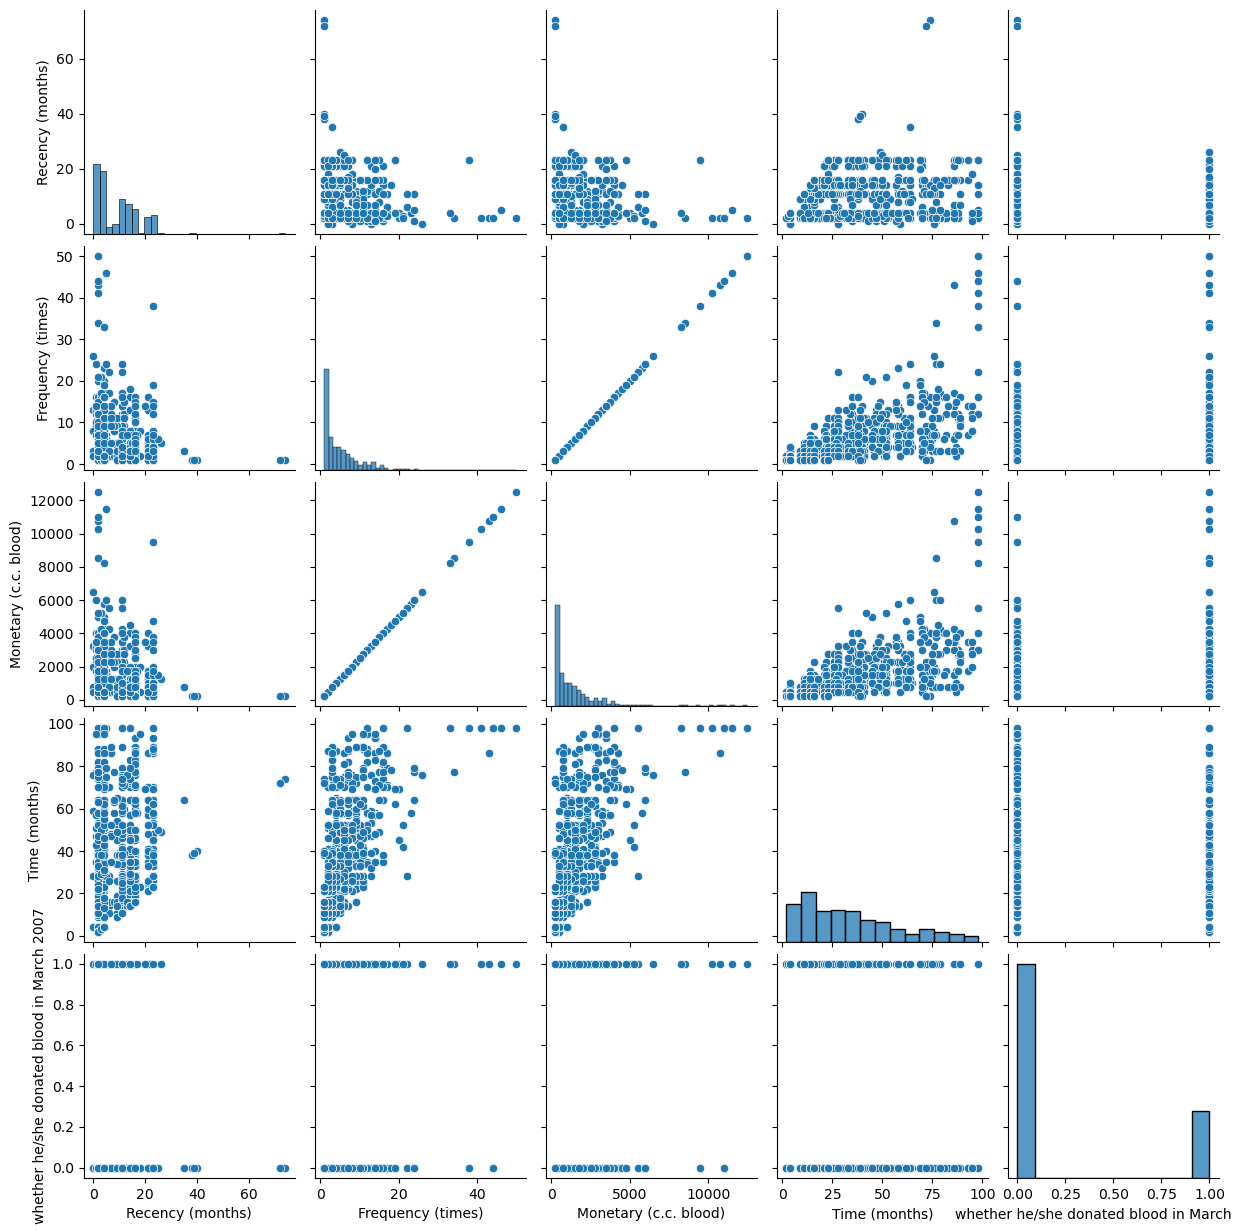

In [12]:
sns.pairplot(blood)
plt.show()

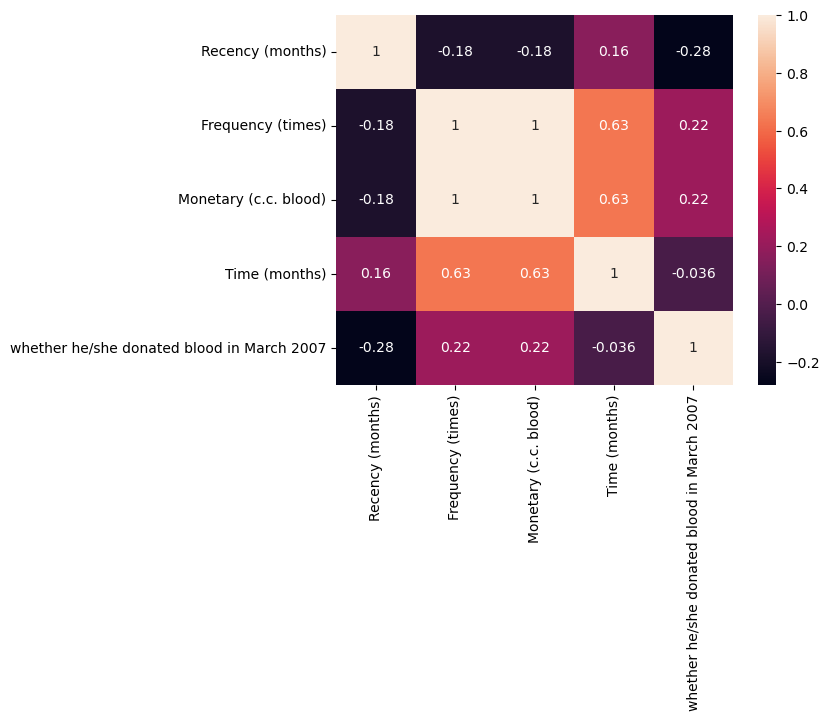

In [20]:
#plot a heatmap
sns.heatmap(blood.corr(), annot=True)
plt.show()


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [26]:
# Define the features (X) and the target variable (y)
X = blood.drop('whether he/she donated blood in March 2007', axis=1)
y = blood['whether he/she donated blood in March 2007']
# Perform an 80/20 Training/Test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
# Check for unbalanced classes
# Check the class distribution after splitting
train_class_distribution = y_train.value_counts()
test_class_distribution = y_test.value_counts()
print("Class Distribution in Training Set:")
print(train_class_distribution)
print("Class Distribution in Test Set:")
print(test_class_distribution)

Class Distribution in Training Set:
whether he/she donated blood in March 2007
0    363
1    115
Name: count, dtype: int64
Class Distribution in Test Set:
whether he/she donated blood in March 2007
0    114
1     36
Name: count, dtype: int64


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Define the model
model = DecisionTreeClassifier(random_state=42)

# Set the hyperparameters
model.set_params(
    criterion='gini',      # Splitting criterion ('gini' or 'entropy')
    max_depth=None,        # Maximum depth of the tree
    min_samples_split=2,   # Minimum number of samples required to split an internal node
    min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node
    max_features=None,     # Number of features to consider when looking for the best split
)

DecisionTreeClassifier(random_state=42)

# Step 9: Fit the Model

In [30]:
# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [31]:
# Use the training data to make predictions
y_train_pred = model.predict(X_train)

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score
# Calculate and print the accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
# Calculate and print the ROC AUC score for the training set
train_roc_auc = roc_auc_score(y_train, y_train_pred)
print("Training ROC AUC:", train_roc_auc)

Training Accuracy: 0.9539748953974896
Training ROC AUC: 0.9043478260869565


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [33]:
# Use the test data to make predictions
y_test_pred = model.predict(X_test)

# Check the test results with the test predictions
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
# Calculate and print the ROC AUC score for the test set
test_roc_auc = roc_auc_score(y_test, y_test_pred)
print("Test ROC AUC:", test_roc_auc)

Test Accuracy: 0.7466666666666667
Test ROC AUC: 0.6242690058479532


In [34]:
# Calculate the accuracy on the validation set
val_accuracy = accuracy_score(y_val, model.predict(X_val))
print("Validation Accuracy (Before Pruning):", val_accuracy)

Validation Accuracy (Before Pruning): 0.6833333333333333


In [35]:
# Perform pruning by finding the optimal alpha value
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [36]:
# Train decision trees with different alpha values
models = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)
    models.append(model)


In [37]:
# Calculate the accuracy on the validation set for each pruned tree
val_accuracies = [accuracy_score(y_val, model.predict(X_val)) for model in models]

In [38]:
# Find the optimal alpha value that gives the highest accuracy
best_alpha = ccp_alphas[val_accuracies.index(max(val_accuracies))]

In [39]:
# Create the final pruned decision tree with the optimal alpha
pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004917212030182742, random_state=42)

In [40]:
# Calculate the accuracy on the validation set for the pruned tree
val_accuracy_pruned = accuracy_score(y_val, pruned_model.predict(X_val))
print("Validation Accuracy (After Pruning):", val_accuracy_pruned)

Validation Accuracy (After Pruning): 0.7833333333333333


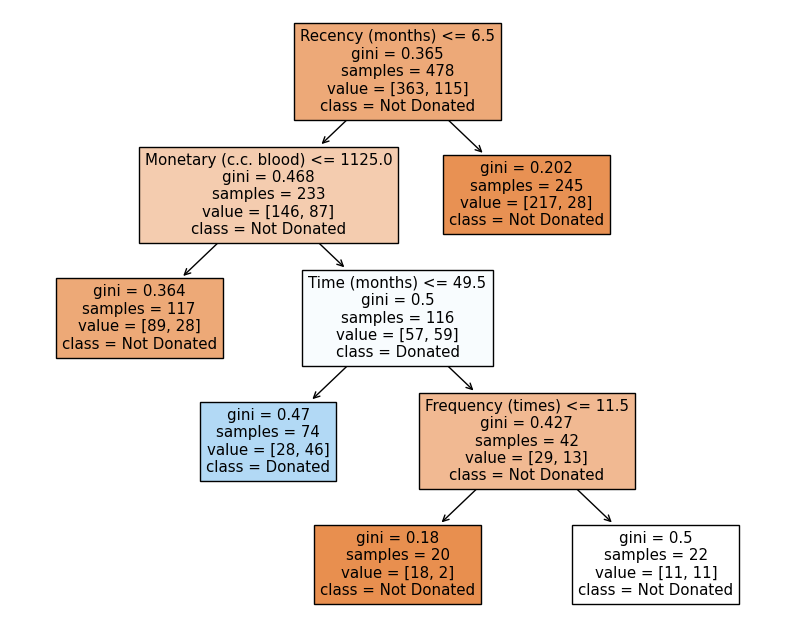

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the pruned decision tree
plt.figure(figsize=(10, 8))
plot_tree(pruned_model, feature_names=X.columns, class_names=["Not Donated", "Donated"], filled=True)
plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



